# Solar Power Prediction Model

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
#  Converts the CSV into a Pandas DataFrame
#  Using relative location, for absolute location use pd.read_csv(r'FILEPATH')
data = pd.read_csv('Solar_Energy_Production.csv')
data['date'] = pd.to_datetime(data['date'])

In [3]:
#  Creates a copy of the data set with only date and kwh production
df_dkwh = data.drop(columns=['name', 'id', 'address', 'public_url', 'installationDate', 'uid'])

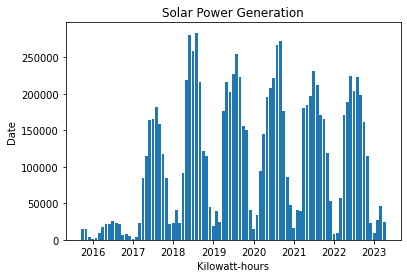

In [4]:
#  Making a monthly view of power output
mdf = df_dkwh.resample(rule='M', on='date')['kWh'].sum()
monthlyx = mdf.index
monthlyy = mdf
plt.bar(monthlyx, monthlyy,width=25)
plt.title('Solar Power Generation')
plt.xlabel('Kilowatt-hours')
plt.ylabel('Date')
plt.show()

In [5]:
#  Continuing to prepare the data
df_dkwh = df_dkwh.set_index('date')
df_dkwh = df_dkwh.groupby([df_dkwh.index.date])['kWh'].sum()
df_dkwh = df_dkwh.reset_index()
df_dkwh = df_dkwh.rename(columns={'index': 'date'})
features = ["year", "month", "day"]
df_dkwh[features] = df_dkwh.apply(lambda row: pd.Series({"year":row.date.year, "month":row.date.month, "day":row.date.day}), axis=1)

In [6]:
#  Splits the testing and training sets before and after target date
split_date = pd.Timestamp('2021-01-01')
dftest = df_dkwh.loc[df_dkwh['date'] >= split_date.date()]
dftrain = df_dkwh.loc[df_dkwh['date'] < split_date.date()]

In [7]:
#  Setting up training and testing sets
testplot = dftest['date']
trainplot = dftrain['date']
Xtest = dftest.drop(columns=['kWh', 'date'])
Ytest = dftest['kWh']
Xtrain = dftrain.drop(columns=['kWh', 'date'])
Ytrain = dftrain['kWh']

In [8]:
#  Reshaping data
Ytrain = Ytrain.array.reshape((-1, 1))
Ytest = Ytest.array.reshape((-1, 1))

In [9]:
#  Instantiating the models
modelLR = LinearRegression()
modelLR.fit(Xtrain.values, Ytrain)
modelDTR = DecisionTreeRegressor()
modelDTR.fit(Xtrain.values, Ytrain)

DecisionTreeRegressor() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. DecisionTreeRegressor DecisionTreeRegressor()

In [10]:
#  Predictions
LRpred = modelLR.predict(Xtest.values)
DTRpred = modelDTR.predict(Xtest.values)

The mean squared error of the linear regression model is:
16033859950.952404
The mean squared error of the decision tree regression model is:
1306922863.7878218
The R-squared of the decision tree regression model is:
0.821800106990774


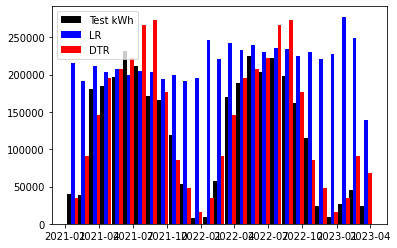

In [11]:
#  Testing
#  Plotting the expected results alongside what the two models returned
modeltest = pd.DataFrame(testplot)
modeltest['Test kWh'] = Ytest
modeltest['LR'] = LRpred
modeltest['DTR'] = DTRpred
modeltest['date'] = pd.to_datetime(modeltest['date'])
modeltest = modeltest.resample(rule='M', on='date')['Test kWh', 'LR', 'DTR'].sum()
plt.bar(modeltest.index - pd.Timedelta(20, unit='d'), modeltest['Test kWh'], label="Test kWh", color='black', width=10)
plt.bar(modeltest.index - pd.Timedelta(10, unit='d'), modeltest['LR'], label="LR", color='blue', width=10)
plt.bar(modeltest.index, modeltest['DTR'], label="DTR", color='red', width=10)
plt.legend()
plt.show()
print("The mean squared error of the linear regression model is:")
print(mean_squared_error(modeltest['LR'], modeltest['Test kWh']))
print("The mean squared error of the decision tree regression model is:")
print(mean_squared_error(modeltest['DTR'], modeltest['Test kWh']))
print("The R-squared of the decision tree regression model is:")
print(r2_score(modeltest['DTR'], modeltest['Test kWh']))

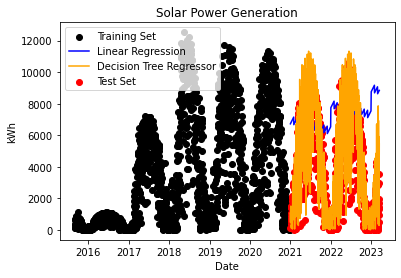

In [12]:
#  Plotting the daily comparison
plt.title('Solar Power Generation')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.scatter(trainplot, Ytrain, label="Training Set", color='black')
plt.plot(testplot, LRpred, label="Linear Regression", color='blue')  # Linear Regression plot
plt.plot(testplot, DTRpred, label="Decision Tree Regressor", color='orange')  # DT Regressor plot
plt.scatter(testplot, Ytest, label="Test Set", color='red')  # Testing reference plot
plt.legend()
plt.show()

In [13]:
#  User interactivity
#  See what the different models predict kWh output based on the date set in the userday variable
userday = [[2020, 1, 1], ]
print(userday)
print("The Linear Regression model predicts:")
print(modelLR.predict(userday))
print("The Decision Tree Regressor model predicts:")
print(modelDTR.predict(userday))

[[2020, 1, 1]]
The Linear Regression model predicts:
[[5716.62721322]]
The Decision Tree Regressor model predicts:
[1052.155]
